# Algorithmes, voyageur de commerce, distance d'édition

## Voyageur de commerce

In [1]:
import numpy as np
import matplotlib.pyplot as plt

villes = np.random.rand(20, 2)
villes[:5]

array([[0.41511992, 0.25980581],
       [0.28882207, 0.18110005],
       [0.43436194, 0.89716744],
       [0.51101688, 0.41073324],
       [0.73591566, 0.73214563]])

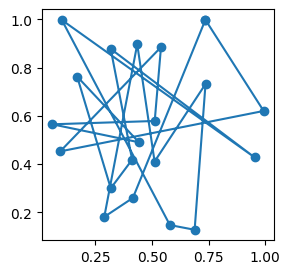

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
indices = list(range(-1, villes.shape[0]))
ax.plot(villes[indices, 0], villes[indices, 1], "o-")

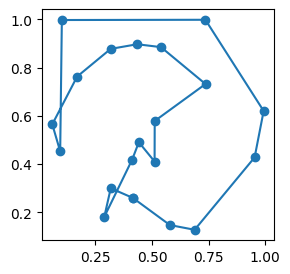

In [3]:
def distance(v1, v2):  # v1= np.array([0, 1]), v2= ....
    return ((v1 - v2) ** 2).sum() ** 0.5


def plus_proche_non_visitee(villes, chemin):
    depart = chemin[-1]
    dmin, imin = None, None
    for i in range(villes.shape[0]):
        if i not in chemin:
            d = distance(villes[depart], villes[i])
            if dmin is None or d < dmin:
                dmin, imin = d, i
    return imin


def algo_proche_en_proche(villes):
    chemin = [0]
    while len(chemin) < villes.shape[0]:
        # trouver la ville la plus proche non visitée de la dernière
        # ville visitée et l'ajouter au chemin
        inext = plus_proche_non_visitee(villes, chemin)
        chemin.append(inext)
    return chemin


chemin = algo_proche_en_proche(villes)
indices = chemin + chemin[:1]
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.plot(villes[indices, 0], villes[indices, 1], "o-")

mieux -1 2 -0.015414159550566658 [0, 11, 1] []
mieux 3 5 -0.034186569174776416 [13, 3] [3, 13]
mieux 6 14 -0.053147377441806753 [4, 16, 2, 9, 12, 14, 17, 7] [7, 17, 14, 12, 9, 2, 16, 4]
mieux 7 9 -0.01748283747037216 [17, 14] [14, 17]
mieux 13 15 -0.19987294649097015 [4, 19] [19, 4]
mieux 2 4 -0.0075636338480231935 [10, 3] [3, 10]
mieux 6 9 -0.2253313144570693 [7, 14, 17] [17, 14, 7]
mieux 8 10 -0.14891254917547306 [7, 12] [12, 7]
mieux 3 6 -0.0478332555189685 [10, 13, 15] [15, 13, 10]


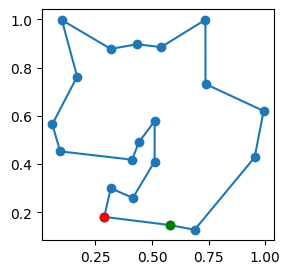

In [4]:
def elimine_croisements(villes, chemin):
    n_iteration = 0
    C = chemin
    while n_iteration < 10 + villes.shape[0]:
        n_iteration += 1  # pour éviter une boucle infini
        mieux = 0
        for i in range(-1, villes.shape[0]):
            for j in range(i + 2, villes.shape[0] - 1):
                delta = (
                    -distance(villes[C[i]], villes[C[i + 1]])
                    - distance(villes[C[j]], villes[C[j + 1]])
                    + distance(villes[C[i]], villes[C[j]])
                    + distance(villes[C[i + 1]], villes[C[j + 1]])
                )
                if delta < 0:
                    mieux += 1
                    print("mieux", i, j, delta, chemin[i + 1 : j + 1], chemin[j:i:-1])
                    # c'est mieux... on retourne les villes du chemin
                    # entre i+1 et j inclus
                    if i >= 0:
                        chemin[i + 1 : j + 1] = chemin[j:i:-1]
                    else:
                        chemin[i + 1 : j + 1] = chemin[j::-1]
        if mieux == 0:
            break


elimine_croisements(villes, chemin)
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
indices = chemin + chemin[:1]
ax.plot(villes[indices, 0], villes[indices, 1], "o-")
ax.plot(villes[chemin[:1], 0], villes[chemin[:1], 1], "or")
ax.plot(villes[chemin[-1:], 0], villes[chemin[-1:], 1], "og")

## Distance d'édition

In [5]:
def distance_edition(m1, m2):
    cout = np.empty((len(m1) + 1, len(m2) + 1))
    predi = np.empty((len(m1) + 1, len(m2) + 1), dtype=np.int64)
    predj = np.empty((len(m1) + 1, len(m2) + 1), dtype=np.int64)
    cout[:, 0] = np.arange(len(m1) + 1)
    cout[0, :] = np.arange(len(m2) + 1)
    predi[:, 0] = np.arange(len(m1) + 1) - 1
    predj[:, 0] = 0
    predi[0, :] = 0
    predj[0, :] = np.arange(len(m2) + 1) - 1
    for i in range(1, len(m1) + 1):
        for j in range(1, len(m2) + 1):
            c_sup = cout[i - 1, j] + 1
            c_ins = cout[i, j - 1] + 1
            c_cmp = cout[i - 1, j - 1] + (1 if m1[i - 1] != m2[j - 1] else 0)
            if c_cmp <= min(c_sup, c_ins):
                cout[i, j], predi[i, j], predj[i, j] = c_cmp, i - 1, j - 1
            elif c_sup <= c_ins:
                cout[i, j], predi[i, j], predj[i, j] = c_sup, i - 1, j
            else:
                cout[i, j], predi[i, j], predj[i, j] = c_ins, i, j - 1
    # alignement
    alignement = [(len(m1), len(m2))]
    while min(alignement[-1]) >= 0:
        i, j = alignement[-1]
        i, j = predi[i, j], predj[i, j]
        alignement.append((i, j))
    alignement = alignement[::-1][2:]
    lettres = [(m1[i - 1], m2[j - 1]) for i, j in alignement]
    return cout, alignement, lettres


cout, alignement, lettres = distance_edition("ENSAE", "ESANE")
print(alignement)
print(lettres)
cout

[(np.int64(1), np.int64(1)), (np.int64(2), np.int64(1)), (np.int64(3), np.int64(2)), (np.int64(4), np.int64(3)), (np.int64(4), np.int64(4)), (5, 5)]
[('E', 'E'), ('N', 'E'), ('S', 'S'), ('A', 'A'), ('A', 'N'), ('E', 'E')]


array([[0., 1., 2., 3., 4., 5.],
       [1., 0., 1., 2., 3., 4.],
       [2., 1., 1., 2., 2., 3.],
       [3., 2., 1., 2., 3., 3.],
       [4., 3., 2., 1., 2., 3.],
       [5., 4., 3., 2., 2., 2.]])